<a href="https://colab.research.google.com/github/Funmiadebajo/GIS/blob/main/PS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-a0707fd5ddfd>:18: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(nj_counties.geometry.centroid.x, nj_counties.geometry.centroid.y, nj_counties['NAME']):


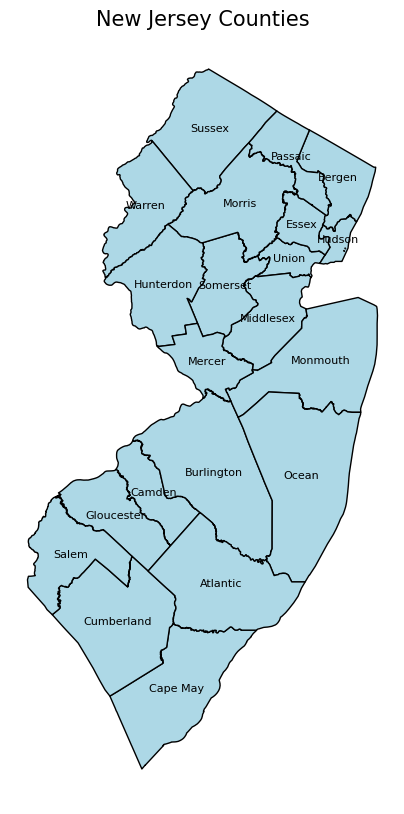

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefile of New Jersey with counties (you may need to download this from a reliable source)
url = "https://www2.census.gov/geo/tiger/TIGER2021/COUNTY/tl_2021_us_county.zip"
counties = gpd.read_file(url)

# Filter for counties in New Jersey
nj_counties = counties[counties['STATEFP'] == '34']  # 34 is the FIPS code for New Jersey

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot the counties
nj_counties.plot(ax=ax, color='lightblue', edgecolor='black')

# Add labels for each county
for x, y, label in zip(nj_counties.geometry.centroid.x, nj_counties.geometry.centroid.y, nj_counties['NAME']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center')

# Add title and remove axis
ax.set_title('New Jersey Counties', fontsize=15)
ax.set_axis_off()

# Show the plot
plt.show()


<ipython-input-2-680cbfc83e6d>:29: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nj_counties['centroid'] = nj_counties.geometry.centroid


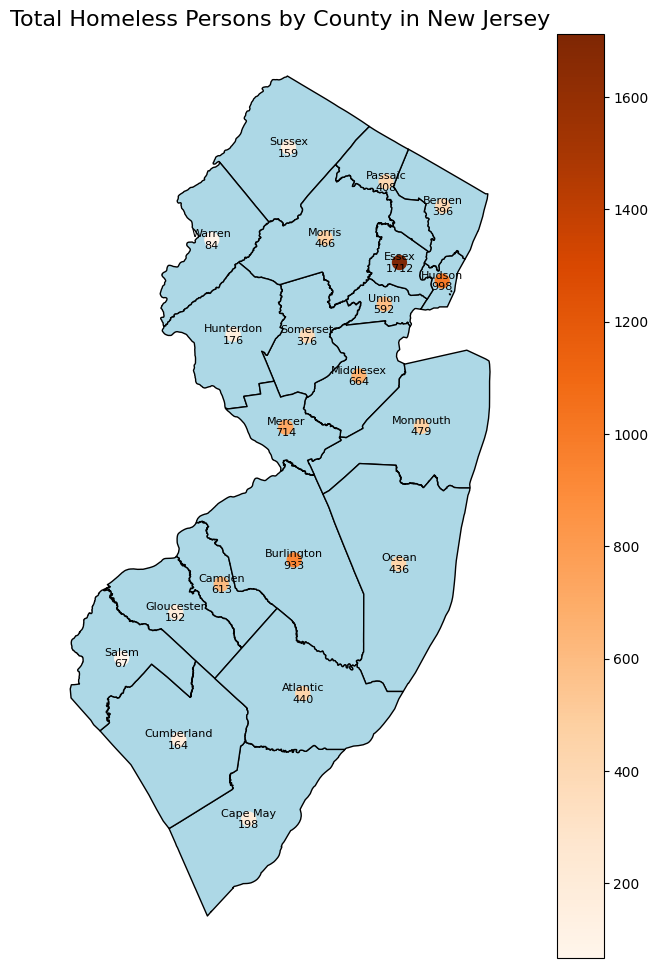

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# https://monarchhousing.org/wp-content/uploads/2023/08/New-Jersey-PIT-Report-2023.pdf
# Data for homeless population by county
data = {
    'County': ['Atlantic', 'Bergen', 'Burlington', 'Camden', 'Cape May', 'Cumberland', 'Essex', 'Gloucester', 'Hudson',
               'Hunterdon', 'Mercer', 'Middlesex', 'Monmouth', 'Morris', 'Ocean', 'Passaic', 'Salem', 'Somerset',
               'Sussex', 'Union', 'Warren'],
    'Total Homeless Persons': [440, 396, 933, 613, 198, 164, 1712, 192, 998, 176, 714, 664, 479, 466, 436, 408, 67,
                               376, 159, 592, 84]
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Load the shapefile of New Jersey counties
url = "https://www2.census.gov/geo/tiger/TIGER2021/COUNTY/tl_2021_us_county.zip"
counties = gpd.read_file(url)

# Filter for counties in New Jersey
nj_counties = counties[counties['STATEFP'] == '34']  # 34 is the FIPS code for New Jersey

# Merge the homeless data with the counties data
nj_counties = nj_counties.merge(df, how='left', left_on='NAME', right_on='County')

# Create centroids for each county
nj_counties['centroid'] = nj_counties.geometry.centroid

# Create a GeoDataFrame for centroids
centroids = gpd.GeoDataFrame(nj_counties, geometry='centroid')

# Normalize the homeless population data for coloring
norm = plt.Normalize(vmin=centroids['Total Homeless Persons'].min(), vmax=centroids['Total Homeless Persons'].max())

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Plot the counties in a light gray color
nj_counties.plot(ax=ax, color='lightblue', edgecolor='black')

# Plot centroids
centroids.plot(ax=ax, column='Total Homeless Persons', cmap='Oranges', markersize=100, legend=True, norm=norm)

# Add labels for each centroid
for x, y, label, homeless in zip(centroids.geometry.x, centroids.geometry.y,
                                 centroids['NAME'], centroids['Total Homeless Persons']):
    ax.text(x, y, f"{label}\n{homeless}", fontsize=8, ha='center', va='center')

# Set plot title
ax.set_title('Total Homeless Persons by County in New Jersey', fontsize=16)
ax.set_axis_off()

# Show the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


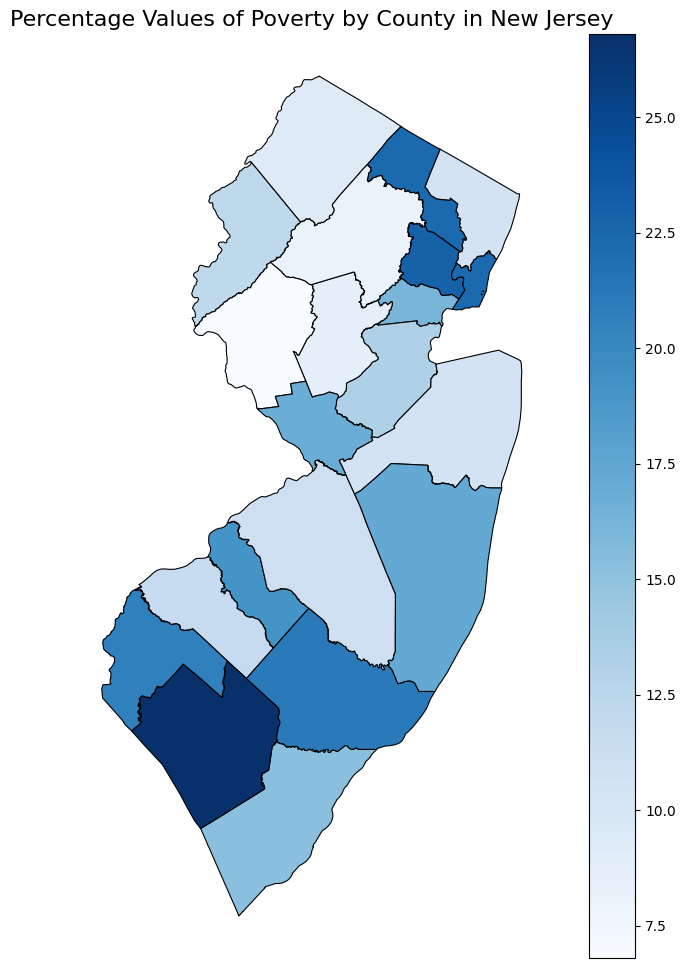

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Data for percentage values by county
data = {
    'County': ['Cumberland County', 'Essex County', 'Hudson County', 'Passaic County', 'Atlantic County',
               'Salem County', 'Camden County', 'Ocean County', 'Mercer County', 'Union County',
               'Cape May County', 'Middlesex County', 'Warren County', 'Gloucester County',
               'Burlington County', 'Bergen County', 'Monmouth County', 'Sussex County',
               'Somerset County', 'Morris County', 'Hunterdon County'],
    'Value (Percent)': [26.8, 22.9, 22.4, 22.4, 21.1, 20.7, 19.1, 17.2, 16.8, 16.1,
                        15.3, 13.3, 12.3, 11.8, 11.1, 10.5, 10.5, 9.3, 8.6, 8.1, 6.8]
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Load the shapefile of New Jersey counties
url = "https://www2.census.gov/geo/tiger/TIGER2021/COUNTY/tl_2021_us_county.zip"
counties = gpd.read_file(url)

# Filter for counties in New Jersey
nj_counties = counties[counties['STATEFP'] == '34']  # 34 is the FIPS code for New Jersey

# Compare the county names
#print("Shapefile County Names:", nj_counties['NAME'].unique())
#print("DataFrame County Names:", df['County'].unique())

# Further standardize and correct any issues manually
df['County'] = df['County'].str.replace("County", "").str.strip()
nj_counties['NAME'] = nj_counties['NAME'].str.replace("County", "").str.strip()

# Compare again after standardization
#print("Cleaned Shapefile County Names:", nj_counties['NAME'].unique())
#print("Cleaned DataFrame County Names:", df['County'].unique())

# Merge the percentage data with the shapefile data
nj_counties = nj_counties.merge(df, how='left', left_on='NAME', right_on='County')

# Check if the merge worked correctly
#print(nj_counties[['NAME', 'Value (Percent)']])

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Plot the counties and shade based on percentage values
nj_counties.plot(ax=ax, column='Value (Percent)', cmap='Blues', linewidth=0.8, edgecolor='black', legend=True)

# Add a title
ax.set_title('Percentage Values of Poverty by County in New Jersey', fontsize=16)

# Remove axis
ax.set_axis_off()

# Show the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
<ipython-input-4-15d3db2df7f7>:49: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nj_counties['centroid'] = nj_counties.geometry.centroid


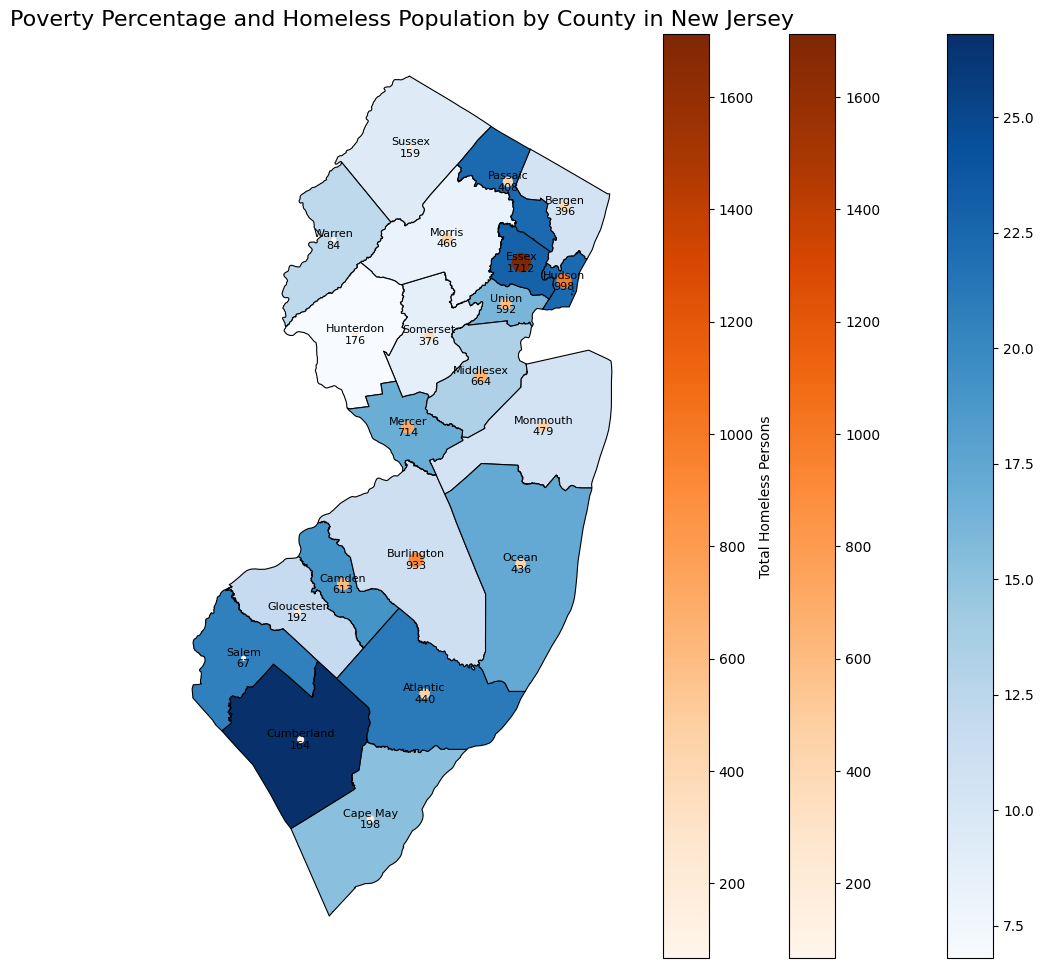

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data for homeless population by county (used for points)
homeless_data = {
    'County': ['Atlantic', 'Bergen', 'Burlington', 'Camden', 'Cape May', 'Cumberland', 'Essex', 'Gloucester', 'Hudson',
               'Hunterdon', 'Mercer', 'Middlesex', 'Monmouth', 'Morris', 'Ocean', 'Passaic', 'Salem', 'Somerset',
               'Sussex', 'Union', 'Warren'],
    'Total Homeless Persons': [440, 396, 933, 613, 198, 164, 1712, 192, 998, 176, 714, 664, 479, 466, 436, 408, 67,
                               376, 159, 592, 84]
}

# Data for percentage values by county (used for shading the counties)
percent_data = {
    'County': ['Cumberland County', 'Essex County', 'Hudson County', 'Passaic County', 'Atlantic County',
               'Salem County', 'Camden County', 'Ocean County', 'Mercer County', 'Union County',
               'Cape May County', 'Middlesex County', 'Warren County', 'Gloucester County',
               'Burlington County', 'Bergen County', 'Monmouth County', 'Sussex County',
               'Somerset County', 'Morris County', 'Hunterdon County'],
    'Value (Percent)': [26.8, 22.9, 22.4, 22.4, 21.1, 20.7, 19.1, 17.2, 16.8, 16.1,
                        15.3, 13.3, 12.3, 11.8, 11.1, 10.5, 10.5, 9.3, 8.6, 8.1, 6.8]
}

# Convert the data into DataFrames
df_homeless = pd.DataFrame(homeless_data)
df_percent = pd.DataFrame(percent_data)

# Load the shapefile of New Jersey counties
url = "https://www2.census.gov/geo/tiger/TIGER2021/COUNTY/tl_2021_us_county.zip"
counties = gpd.read_file(url)

# Filter for counties in New Jersey
nj_counties = counties[counties['STATEFP'] == '34']  # 34 is the FIPS code for New Jersey

# Standardize county names for consistent merging
df_percent['County'] = df_percent['County'].str.replace("County", "").str.strip()
df_homeless['County'] = df_homeless['County'].str.strip()
nj_counties['NAME'] = nj_counties['NAME'].str.strip()

# Merge the percentage data with the shapefile data (for shading)
nj_counties = nj_counties.merge(df_percent, how='left', left_on='NAME', right_on='County')

# Merge the homeless data with the shapefile data (for plotting points)
nj_counties = nj_counties.merge(df_homeless, how='left', left_on='NAME', right_on='County')

# Create centroids for each county (for plotting homeless points)
nj_counties['centroid'] = nj_counties.geometry.centroid
centroids = gpd.GeoDataFrame(nj_counties, geometry='centroid')

# Normalize the homeless population data for coloring (orange gradient)
norm = plt.Normalize(vmin=centroids['Total Homeless Persons'].min(), vmax=centroids['Total Homeless Persons'].max())

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Plot the counties and shade based on percentage values (poverty)
nj_counties.plot(ax=ax, column='Value (Percent)', cmap='Blues', linewidth=0.8, edgecolor='black', legend=True)

# Plot centroids (homelessness points) with 'Oranges' colormap
centroids.plot(ax=ax, column='Total Homeless Persons', cmap='Oranges', markersize=centroids['Total Homeless Persons'] / 10, legend=True, norm=norm)

# Add labels for each centroid
for x, y, label, homeless in zip(centroids.geometry.x, centroids.geometry.y,
                                 centroids['NAME'], centroids['Total Homeless Persons']):
    ax.text(x, y, f"{label}\n{homeless}", fontsize=8, ha='center', va='center')

# Add a colorbar for the homeless population (orange gradient)
sm = plt.cm.ScalarMappable(cmap='Oranges', norm=norm)
sm._A = []  # Empty array for the colorbar
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Total Homeless Persons')

# Set plot title
ax.set_title('Poverty Percentage and Homeless Population by County in New Jersey', fontsize=16)

# Remove axis
ax.set_axis_off()

# Show the plot
plt.show()
